In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "dxDAO - xDXdao"
SPLITS_FREQ = "W-THU"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2022-05-05"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2019-07-18,0.600000,0.400000,0.280000,0.140000,0.093333,0.014000,0.600000,0.805444,0.845865,0.845865,...,1.000000,1.000000,1.000000,0.777778,0.888889,0.888889,0.888889,0.888889,0.888889,0.125957
2019-07-25,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121209
2019-08-01,0.285714,0.309524,0.242857,0.192857,0.128571,0.019286,0.285714,0.346270,0.372130,0.488151,...,0.717857,0.717857,0.717857,0.445833,0.495238,0.523810,0.523810,0.523810,0.523810,0.128073
2019-08-08,0.200000,0.400000,0.280000,0.220000,0.153333,0.023000,0.200000,0.461209,0.464757,0.592370,...,0.900000,1.000000,1.000000,0.600000,0.733333,0.783333,0.783333,0.783333,0.783333,0.124377
2019-08-15,0.214286,0.238095,0.185714,0.128571,0.085714,0.012857,0.200000,0.231285,0.223023,0.282970,...,0.446429,0.446429,0.446429,0.166667,0.366667,0.400000,0.400000,0.400000,0.400000,0.127325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080990
2023-03-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070354
2023-03-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070659


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2019-07-18,1.0,0.466667,0.280000,0.140000,0.093333,0.014000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.866667,1.000000,1.000000,1.0,1.0,1.0,0.127216
2019-07-25,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.126446
2019-08-01,1.0,0.714286,0.514286,0.257143,0.171429,0.025714,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.564286,0.907143,1.000000,1.0,1.0,1.0,0.127607
2019-08-08,1.0,0.700000,0.460000,0.230000,0.153333,0.023000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.570000,0.960000,1.000000,1.0,1.0,1.0,0.127040
2019-08-15,1.0,0.711111,0.533333,0.286667,0.191111,0.028667,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.544444,0.866667,0.966667,1.0,1.0,1.0,0.129042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,1.0,1.000000,0.800000,0.400000,0.266667,0.040000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.250000,0.750000,1.000000,1.0,1.0,1.0,0.123648
2023-03-16,1.0,1.000000,0.600000,0.300000,0.200000,0.030000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.333333,1.000000,1.000000,1.0,1.0,1.0,0.124719
2023-03-23,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.120047


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2019-07-18,0.600000,0.400000,0.280000,0.140000,0.093333,0.014000,0.600000,0.805444,0.845865,0.845865,...,1.000000,1.000000,0.777778,0.888889,0.888889,0.888889,0.888889,0.888889,0.125957,openpop
2019-07-25,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121209,openpop
2019-08-01,0.285714,0.309524,0.242857,0.192857,0.128571,0.019286,0.285714,0.346270,0.372130,0.488151,...,0.717857,0.717857,0.445833,0.495238,0.523810,0.523810,0.523810,0.523810,0.128073,openpop
2019-08-08,0.200000,0.400000,0.280000,0.220000,0.153333,0.023000,0.200000,0.461209,0.464757,0.592370,...,1.000000,1.000000,0.600000,0.733333,0.783333,0.783333,0.783333,0.783333,0.124377,openpop
2019-08-15,0.214286,0.238095,0.185714,0.128571,0.085714,0.012857,0.200000,0.231285,0.223023,0.282970,...,0.446429,0.446429,0.166667,0.366667,0.400000,0.400000,0.400000,0.400000,0.127325,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080990,openpop
2023-03-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070354,openpop
2023-03-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070659,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-03-10,2.0,21d,2022-03-10,0.001366,0.013102,16.0,6.0,12.222222,0.444444,0.333333,...,0.416667,0.625000,0.625000,0.625000,0.625000,0.625000,0.127878,itemknn,test,NaN
2022-03-17,2.0,21d,2022-03-17,0.004332,0.012440,15.0,6.0,11.000000,0.142857,0.047619,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.126854,itemknn,test,NaN
2022-03-24,1.0,14d,2022-03-24,0.003121,0.012129,14.0,6.0,10.857143,0.428571,0.285714,...,0.583333,0.750000,0.750000,0.750000,0.750000,0.750000,0.126572,itemknn,test,NaN
2022-03-31,15.0,60d,2022-03-31,0.008955,0.012696,9.0,4.0,7.400000,0.200000,0.333333,...,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,0.128925,itemknn,test,NaN
2022-04-07,9.0,10YE,2022-04-07,0.369823,0.034532,11.0,5.0,8.666667,0.333333,0.388889,...,0.291667,0.541667,0.604167,0.604167,0.604167,0.604167,0.124719,itemknn,test,NaN
2022-04-14,1.0,14d,2022-04-14,0.001190,0.002404,17.0,4.0,4.000000,0.000000,0.333333,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.113876,itemknn,test,NaN
2022-04-21,15.0,90d,2022-04-21,0.019941,0.015593,11.0,6.0,9.000000,0.000000,0.133333,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.116400,itemknn,test,NaN
2022-04-28,1.0,7d,2022-04-28,0.001633,0.006609,11.0,8.0,8.400000,0.200000,0.400000,...,0.250000,0.575000,0.775000,0.775000,0.775000,0.775000,0.126866,itemknn,test,NaN
2022-05-05,6.0,14d,2022-05-05,0.005944,0.003175,10.0,8.0,9.000000,0.000000,0.166667,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.119978,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-03-10,2.0,21d,2022-03-10,0.001366,0.013102,16.0,6.0,12.222222,0.444444,0.333333,...,0.416667,0.625000,0.625000,0.625000,0.625000,0.625000,0.127878,itemknn,test,NaN
2022-03-17,2.0,21d,2022-03-17,0.004332,0.012440,15.0,6.0,11.000000,0.142857,0.047619,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.126854,itemknn,test,NaN
2022-03-24,1.0,14d,2022-03-24,0.003121,0.012129,14.0,6.0,10.857143,0.428571,0.285714,...,0.583333,0.750000,0.750000,0.750000,0.750000,0.750000,0.126572,itemknn,test,NaN
2022-03-31,15.0,60d,2022-03-31,0.008955,0.012696,9.0,4.0,7.400000,0.200000,0.333333,...,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,0.128925,itemknn,test,NaN
2022-04-07,9.0,10YE,2022-04-07,0.369823,0.034532,11.0,5.0,8.666667,0.333333,0.388889,...,0.291667,0.541667,0.604167,0.604167,0.604167,0.604167,0.124719,itemknn,test,NaN
2022-04-14,1.0,14d,2022-04-14,0.001190,0.002404,17.0,4.0,4.000000,0.000000,0.333333,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.113876,itemknn,test,NaN
2022-04-21,15.0,90d,2022-04-21,0.019941,0.015593,11.0,6.0,9.000000,0.000000,0.133333,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.116400,itemknn,test,NaN
2022-04-28,1.0,7d,2022-04-28,0.001633,0.006609,11.0,8.0,8.400000,0.200000,0.400000,...,0.250000,0.575000,0.775000,0.775000,0.775000,0.775000,0.126866,itemknn,test,NaN
2022-05-05,6.0,14d,2022-05-05,0.005944,0.003175,10.0,8.0,9.000000,0.000000,0.166667,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.119978,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

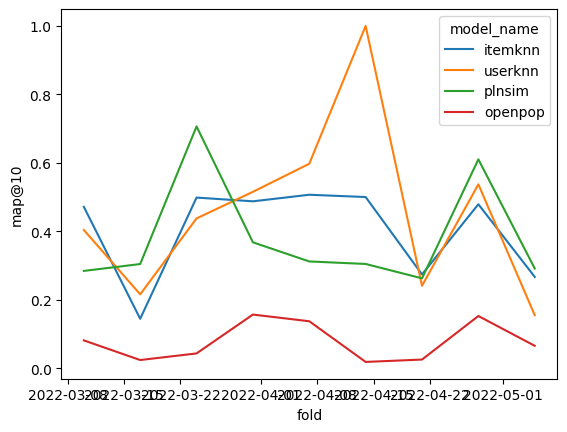

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2022-03-03,2,21d,2022-03-03,0.001161,0.009804,16,6,13.428571,0.571429,0.380952,0.257143,0.214286,...,0.809524,1.0,1.0,0.508333,0.580000,0.580000,0.580000,0.580000,0.580000,0.127299
2022-03-10,2,21d,2022-03-10,0.001366,0.013102,16,6,12.222222,0.444444,0.333333,0.200000,0.222222,...,0.907407,1.0,1.0,0.416667,0.625000,0.625000,0.625000,0.625000,0.625000,0.127878
2022-03-17,1,14d,2022-03-17,0.001664,0.011511,15,6,11.000000,0.285714,0.095238,0.085714,0.071429,...,0.571429,1.0,1.0,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.126125
2022-03-24,15,60d,2022-03-24,0.008802,0.018648,14,6,11.333333,0.555556,0.296296,0.200000,0.177778,...,1.000000,1.0,1.0,0.750000,0.750000,0.800000,0.800000,0.800000,0.800000,0.131991
2022-03-31,9,10YE,2022-03-31,0.383094,0.027489,9,4,7.200000,0.600000,0.400000,0.320000,0.200000,...,1.000000,1.0,1.0,0.611111,0.541667,0.541667,0.541667,0.541667,0.541667,0.132622
2022-04-07,1,14d,2022-04-07,0.001197,0.007669,11,5,8.200000,0.800000,0.600000,0.480000,0.260000,...,1.000000,1.0,1.0,0.458333,0.812500,0.875000,0.875000,0.875000,0.875000,0.132655
2022-04-14,15,90d,2022-04-14,0.020592,0.006089,17,4,4.000000,1.000000,0.333333,0.200000,0.100000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.118476
2022-04-21,1,7d,2022-04-21,0.005869,0.004238,11,6,7.666667,0.333333,0.222222,0.133333,0.100000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.126978
2022-04-28,6,14d,2022-04-28,0.001009,0.006919,11,8,8.400000,0.600000,0.466667,0.440000,0.280000,...,1.000000,1.0,1.0,0.316667,0.600000,0.700000,0.700000,0.700000,0.700000,0.126586
